
## Importing Libraries 



In [1]:

# TensorFlow and tf.keras

import tensorflow as tf

from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt

# Import the Fashion MNIST dataset
We uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

We uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',

               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)

print(len(train_labels))

print(train_labels)

print(test_images.shape)

print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


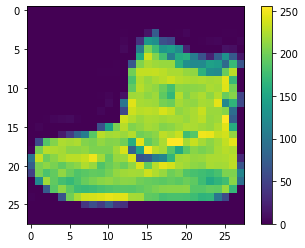

9


In [4]:

plt.figure()

plt.imshow(train_images[0])

plt.colorbar()

plt.grid(False)

plt.show()
print(train_labels[0])

In [5]:

train_images = train_images / 255.0

test_images = test_images / 255.0

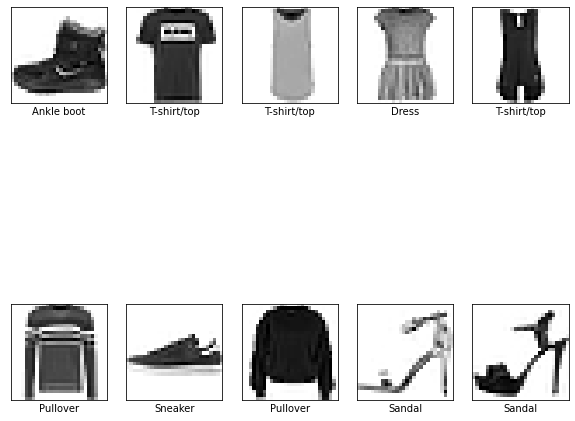

In [6]:

plt.figure(figsize=(10,10))

for i in range(10):

    plt.subplot(2,5,i+1)

    plt.xticks([])

    plt.yticks([])

    plt.grid(False)

    plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [7]:
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(28, 28)),

    keras.layers.Dense(128, activation='relu'),

    keras.layers.Dense(10, activation='softmax')
    # In the last layer numbers of neurons equals to number of classes in dataset(e.g. 10)

])

In [8]:

model.compile(optimizer='adam',

              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

              metrics=['accuracy'])

In [9]:

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 0.5017 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3755 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3385 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3124 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2676 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9060
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2384 - accurac

In [10]:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 0.3411 - accuracy: 0.8827 - 563ms/epoch - 2ms/step

Test accuracy: 0.8827000260353088


In [18]:
img = test_images[3]
img = img.reshape(1, 784)

[predictions] = model.predict(img)

print("Predicting the class : ",np.argmax(predictions))

print("Test Label : ",test_labels[3])

Predicting the class :  1
Test Label :  1


9
2
1
1
6
1
4
6
5
7


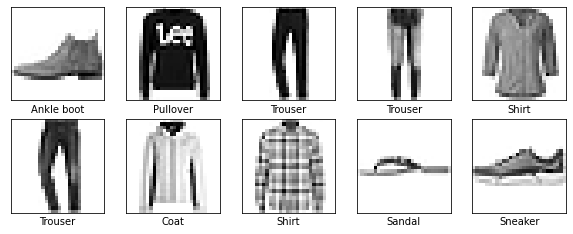

In [19]:
plt.figure(figsize=(10,10))

for i in range(10):

    plt.subplot(5,5,i+1)

    plt.xticks([])

    plt.yticks([])

    plt.grid(False)

    plt.imshow(test_images[i], cmap=plt.cm.binary)
    img = test_images[i]
    img = img.reshape(1, 784)
    predictions = model.predict(img)
    print(np.argmax(predictions))
    plt.xlabel(class_names[np.argmax(predictions)])

plt.show()